# scikit-learn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import math
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn: ", sklearn.__version__)
print("yfinance: ", yf.__version__)



numpy:  1.19.5
pandas:  1.1.5
matplotlib:  3.3.4
sklearn:  0.24.2
yfinance:  0.1.63


In [3]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2022-07-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [4]:
# Create independent variable data
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset['Close_7d'] = dataset['Adj Close'].shift(7)
dataset['Close_14d'] = dataset['Adj Close'].shift(14)
dataset['Close_delta'] = dataset['Close_14d'] - dataset['Close_7d']
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Close_7d,Close_14d,Close_delta
Date,,,,,,,,,,,,,,,
2018-01-23,12.82,13.00,12.76,12.94,12.94,46417200,-0.009360,0.018809,0,1,0,0.022925,12.14,10.98,-1.160001
2018-01-24,13.02,13.05,12.60,12.71,12.71,41956400,0.023810,0.035714,1,0,0,-0.017774,12.02,11.55,-0.470000
2018-01-25,12.78,12.94,12.32,12.41,12.41,42966600,0.028951,0.050325,1,0,1,-0.023603,11.91,12.12,0.210000
2018-01-26,12.70,12.95,12.62,12.95,12.95,44239000,-0.019685,0.026149,1,1,1,0.043513,12.18,11.88,-0.300000
2018-01-29,13.13,13.47,13.05,13.32,13.32,66645400,-0.014471,0.032184,1,0,0,0.028571,12.47,12.28,-0.190001


In [5]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Close_7d,Close_14d,Close_delta
Date,,,,,,,,,,,,,,,
2022-06-24,83.559998,87.529999,83.080002,87.080002,87.080002,88553900,-0.042125,0.053563,0,1,0,0.056412,86.989998,106.300003,19.310005
2022-06-27,87.360001,88.220001,85.250000,86.160004,86.160004,74663500,0.013736,0.034839,1,0,0,-0.010565,89.300003,105.650002,16.349998
2022-06-28,85.709999,86.730003,80.430000,80.779999,80.779999,95618600,0.057520,0.078329,1,0,0,-0.062442,82.050003,105.279999,23.229996
2022-06-29,79.550003,79.750000,76.510002,77.989998,77.989998,104140900,0.019610,0.042347,1,0,0,-0.034538,81.570000,101.900002,20.330002
2022-06-30,77.730003,78.910004,75.480003,76.470001,76.470001,105368600,0.016210,0.045443,0,0,0,-0.019490,83.790001,98.800003,15.010002


In [6]:
# View rows and columns
dataset.shape

(1118, 15)

In [7]:
# View data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1118 entries, 2018-01-23 to 2022-06-30
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1118 non-null   float64
 1   High               1118 non-null   float64
 2   Low                1118 non-null   float64
 3   Close              1118 non-null   float64
 4   Adj Close          1118 non-null   float64
 5   Volume             1118 non-null   int64  
 6   Open_Close         1118 non-null   float64
 7   High_Low           1118 non-null   float64
 8   Increase_Decrease  1118 non-null   int32  
 9   Buy_Sell_on_Open   1118 non-null   int32  
 10  Buy_Sell           1118 non-null   int32  
 11  Returns            1118 non-null   float64
 12  Close_7d           1118 non-null   float64
 13  Close_14d          1118 non-null   float64
 14  Close_delta        1118 non-null   float64
dtypes: float64(11), int32(3), int64(1)
memory usage: 126.6

In [8]:
# View data statistics
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Close_7d,Close_14d,Close_delta
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1.118000e+03,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,59.966395,61.194857,58.635733,59.922227,59.922227,7.032065e+07,-0.000191,0.044551,0.471377,0.522361,0.508945,0.002253,59.485107,59.017379,-0.467728
std,38.147215,38.928299,37.241516,38.072378,38.072378,3.671420e+07,0.029836,0.023147,0.499403,0.499723,0.500144,0.035986,38.214841,38.336892,6.022429
min,9.080000,9.770000,9.040000,9.530000,9.530000,1.670590e+07,-0.115245,0.012392,0.000000,0.000000,0.000000,-0.154454,9.530000,9.530000,-29.000000
25%,26.964999,27.620000,26.285000,27.217499,27.217499,4.393120e+07,-0.016554,0.027568,0.000000,0.000000,0.000000,-0.017223,26.500000,26.245000,-2.974997
50%,52.245001,53.080000,51.270000,52.224998,52.224998,5.859045e+07,0.001243,0.038733,0.000000,1.000000,1.000000,0.000633,51.570000,50.195000,-0.500000
75%,88.787498,90.722498,86.895000,88.817497,88.817497,8.719940e+07,0.016516,0.055063,1.000000,1.000000,1.000000,0.021070,88.817497,88.707502,1.752499
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08,0.124676,0.148305,1.000000,1.000000,1.000000,0.199481,161.910004,161.910004,29.329994


Text(0.5, 1.0, 'AMD Closing Price between 2018-01-01 & 2022-07-01')

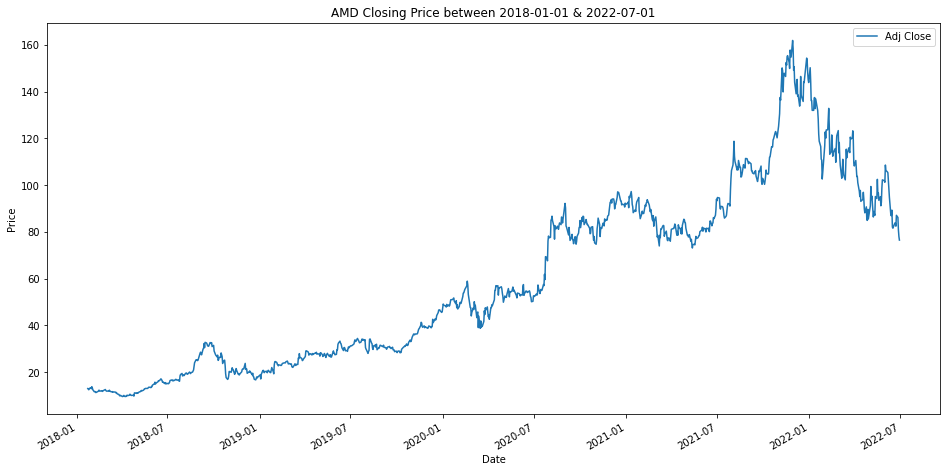

In [9]:
# Plot Line Chart
dataset['Adj Close'].plot(legend=True, figsize=(16,8))
plt.ylabel('Price')
plt.title(symbol + ' Closing Price between ' + start + ' & '  + end)

In [10]:
# Create copy dataset
df = dataset.dropna().copy()

# define the predictors  
predictors = ['Open', 'High', 'Low', 'Volume', 'Returns', 'Close_7d', 'Close_14d', 'Close_delta']

# define the target column
target = 'Adj Close'

In [11]:
# Do not use the last 7 days for training the model
dropN = 7
X = df[predictors][:-dropN]
y = df[[target]][:-dropN]

In [12]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
# Score the model
df['PredictLR'] = model.predict(df[predictors])

In [13]:
df[['PredictLR', 'Adj Close']]

,PredictLR,Adj Close
Date,,
2018-01-23,13.185578,12.940000
2018-01-24,12.454528,12.710000
2018-01-25,12.198570,12.410000
2018-01-26,13.400048,12.950000
2018-01-29,13.661488,13.320000
...,...,...
2022-06-24,86.893187,87.080002
2022-06-27,86.424241,86.160004
2022-06-28,81.868093,80.779999


Text(0.5, 1.0, 'AMD Predict and Closing Price')

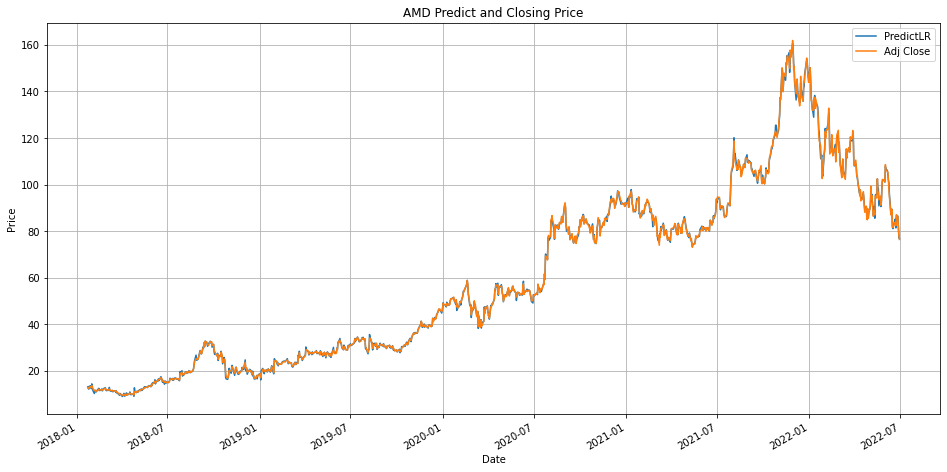

In [14]:
df[['PredictLR', 'Adj Close']].plot(legend=True, figsize=(16,8))
plt.ylabel('Price')
plt.grid()
plt.title(symbol + ' Predict and Closing Price')

In [15]:
from sklearn import svm

regr = svm.SVR()
regr.fit(X, y)
df['PredictSVM'] = regr.predict(df[predictors])

In [16]:
df[['PredictLR', 'PredictSVM', 'Adj Close']]

,PredictLR,PredictSVM,Adj Close
Date,,,
2018-01-23,13.185578,56.772874,12.940000
2018-01-24,12.454528,58.428346,12.710000
2018-01-25,12.198570,58.059245,12.410000
2018-01-26,13.400048,57.589125,12.950000
2018-01-29,13.661488,49.140151,13.320000
...,...,...,...
2022-06-24,86.893187,42.674237,87.080002
2022-06-27,86.424241,46.448311,86.160004
2022-06-28,81.868093,41.229954,80.779999


Text(0.5, 1.0, 'AMD Predict and Closing Price')

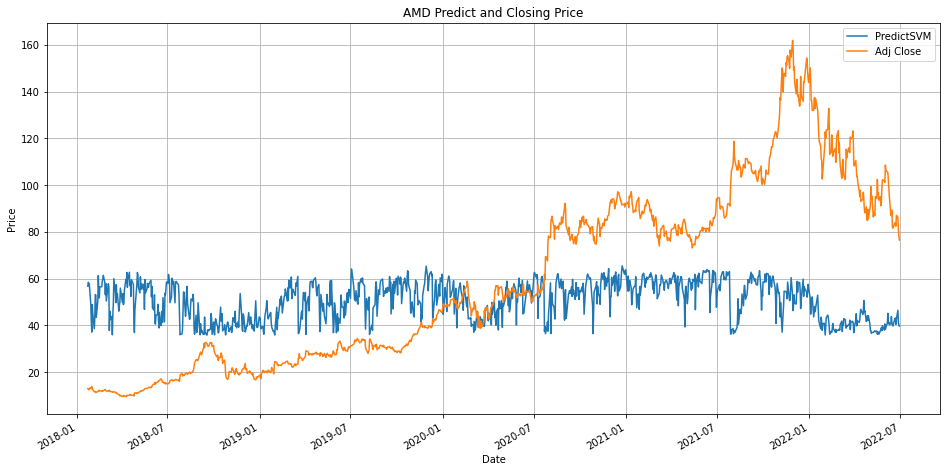

In [17]:
df[['PredictSVM', 'Adj Close']].plot(legend=True, figsize=(16,8))
plt.ylabel('Price')
plt.grid()
plt.title(symbol + ' Predict and Closing Price')

In [18]:
# Split the dataset in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale inputs
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" , 
                   max_iter=5000)
reg.fit(X_trainscaled, y_train)

# scale inputs before predicting
df['PredictMLP'] = reg.predict(sc_X.fit_transform(df[predictors]))

Text(0.5, 1.0, 'AMD Predict and Closing Price')

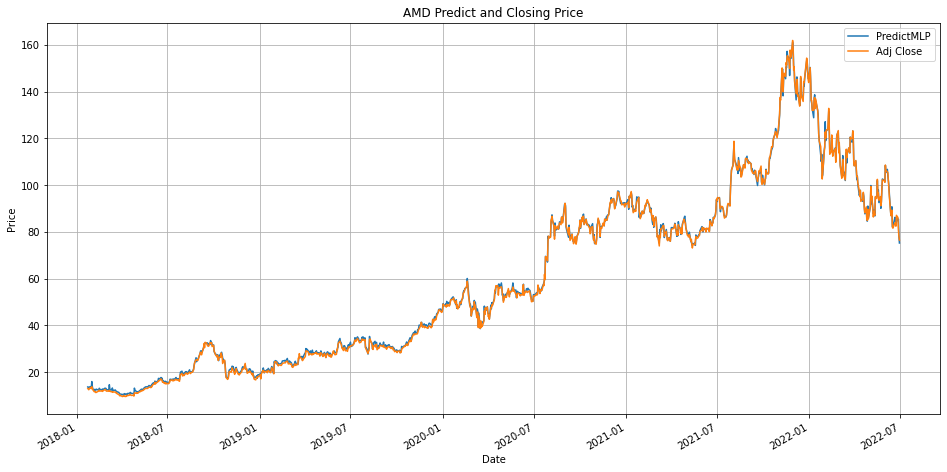

In [19]:
df[['PredictMLP', 'Adj Close']].plot(legend=True, figsize=(16,8))
plt.ylabel('Price')
plt.grid()
plt.title(symbol + ' Predict and Closing Price')

In [20]:
df[['PredictLR', 'PredictSVM', 'PredictMLP', 'Adj Close']]

,PredictLR,PredictSVM,PredictMLP,Adj Close
Date,,,,
2018-01-23,13.185578,56.772874,13.624758,12.940000
2018-01-24,12.454528,58.428346,13.401760,12.710000
2018-01-25,12.198570,58.059245,13.258503,12.410000
2018-01-26,13.400048,57.589125,13.604934,12.950000
2018-01-29,13.661488,49.140151,13.765478,13.320000
...,...,...,...,...
2022-06-24,86.893187,42.674237,86.327822,87.080002
2022-06-27,86.424241,46.448311,84.705403,86.160004
2022-06-28,81.868093,41.229954,85.482430,80.779999


Text(0.5, 1.0, 'AMD Predict and Closing Price')

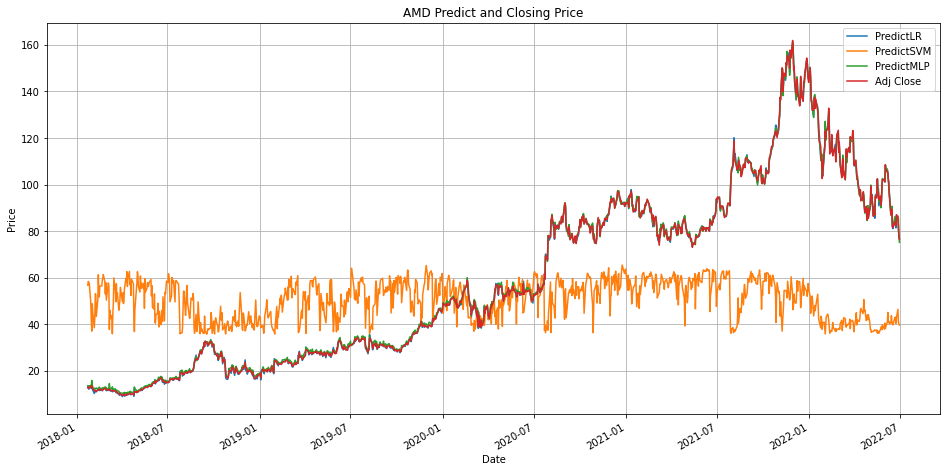

In [21]:
df[['PredictLR', 'PredictSVM', 'PredictMLP', 'Adj Close']].plot(legend=True, figsize=(16,8))
plt.ylabel('Price')
plt.grid()
plt.title(symbol + ' Predict and Closing Price')

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
print("                     R2-score        RMSE        MAE")
print("The Score with LR  : {:5.4f}         {:6.5f}     {:6.5f}".format((r2_score(df['PredictLR'], df['Adj Close'])),
                                                   mean_squared_error(df['PredictLR'], df['Adj Close']),
                                                   mean_absolute_error(df['PredictLR'], df['Adj Close'])))
print("The Score with SVM : {:5.4f}       {:6.5f}  {:6.5f}".format((r2_score(df['PredictSVM'], df['Adj Close'])),
                                                   mean_squared_error(df['PredictSVM'], df['Adj Close']),
                                                   mean_absolute_error(df['PredictSVM'], df['Adj Close'])))
print("The Score with MLP : {:5.4f}         {:6.5f}     {:6.5f}".format((r2_score(df['PredictMLP'], df['Adj Close'])),
                                                   mean_squared_error(df['PredictMLP'], df['Adj Close']),
                                                   mean_absolute_error(df['PredictMLP'], df['Adj Close'])))


                     R2-score        RMSE        MAE
The Score with LR  : 0.9996         0.61818     0.52691
The Score with SVM : -22.2408       1556.69499  32.17290
The Score with MLP : 0.9995         0.74361     0.68171


Text(0.5, 1.0, 'AMD Price Prediction')

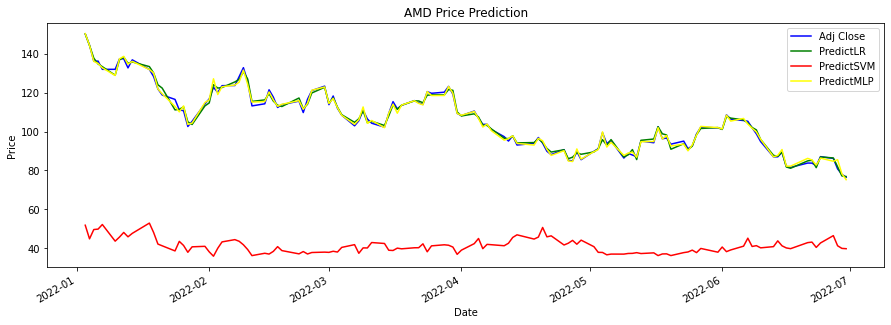

In [24]:
df_plot = df[['PredictLR', 'PredictSVM', 'PredictMLP', 'Adj Close']][df.index > '2022-01-01']

ax = df_plot[['Adj Close']].plot(color='blue', ls='-', figsize=(15,5))
ax = df_plot[['PredictLR']].plot(ax=ax, color='green')
ax = df_plot[['PredictSVM']].plot(ax=ax, color='red')
ax = df_plot[['PredictMLP']].plot(ax=ax, color='yellow')
plt.ylabel('Price')
plt.title(symbol + ' Price Prediction')